In [3]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# To load the CSV into a DataFrame
df = pd.read_csv("SuperStore_Sales_Dataset.csv")

In [43]:
# Show
print("CSV Data:")
print(df.head())

CSV Data:
   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2019-152156  2019-08-11  2019-11-11    Second Class    CG-12520   
1       2  CA-2019-152156  2019-08-12  2019-11-12    Second Class    CG-12520   
2       3  CA-2019-138688  2019-08-13  2019-11-13    Second Class    DV-13045   
3      13  CA-2020-114412  2019-08-14  2019-11-14  Standard Class    AA-10480   
4      14  CA-2019-161389  2019-08-15  2019-11-15  Standard Class    IM-15070   

     Customer_Name    Segment        Country         City           State  \
0      Claire Gute   Consumer  United States    Henderson        Kentucky   
1      Claire Gute   Consumer  United States    Henderson        Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles      California   
3     Andrew Allen   Consumer  United States      Concord  North Carolina   
4     Irene Maddox   Consumer  United States      Seattle      Washington   

  Region       Product_ID         Catego

In [45]:
# SQLite database and inserted into db
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)
print("\n Data loaded into SQLite database.")


 Data loaded into SQLite database.


In [31]:
print(df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name',
       'Sales', 'Quantity', 'Profit', 'Payment_Mode'],
      dtype='object')


In [33]:
# SQL Query: total quantity and revenue per product
query = """
SELECT 
    [Product_Name] AS product,
    SUM(Quantity) AS total_qty,
    SUM(Quantity * Sales) AS revenue
FROM sales
GROUP BY [Product_Name]
ORDER BY revenue DESC
LIMIT 10
"""



In [35]:
# Execute query and store result in DataFrame
summary_df = pd.read_sql_query(query, conn)


In [47]:
# Print results
print("\n Sales Summary (Top 10 Products by Revenue):")
print(summary_df)



 Sales Summary (Top 10 Products by Revenue):
                                             product  total_qty     revenue
0                            Samsung Galaxy Mega 6.3         34  110393.388
1               Hewlett Packard LaserJet 3310 Copier         31   86870.324
2   3D Systems Cube Printer, 2nd Generation, Magenta         11   84639.350
3       HON 5400 Series Task Chairs for Big and Tall         21   73829.802
4                 Logitech P710e Mobile Speakerphone         35   67447.890
5  Martin Yale Chadless Opener Electric Letter Op...         16   60601.634
6   GBC Ibimaster 500 Manual ProClick Binding System         31   56399.630
7                 Chromcraft Round Conference Tables         59   55939.927
8         GBC DocuBind TL300 Electric Binding System         21   52374.022
9              Canon imageCLASS 2200 Advanced Copier         20   51289.276


<Figure size 1200x600 with 0 Axes>

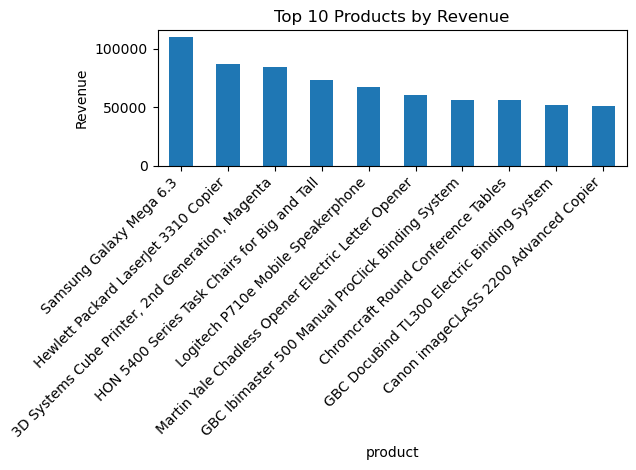

In [39]:
# Plot bar chart of revenue
plt.figure(figsize=(12, 6))
summary_df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [41]:
# Close the DB connection
conn.close()